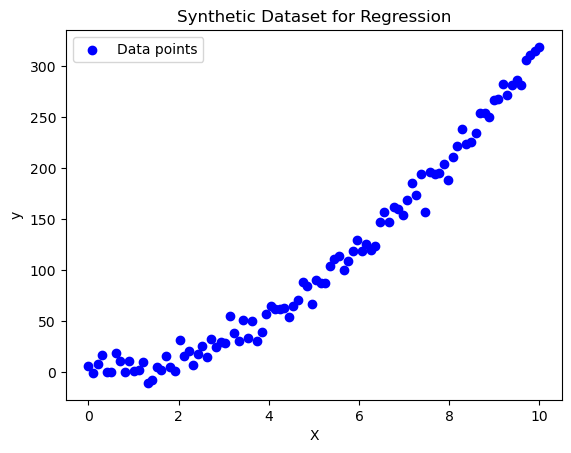

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
np.random.seed(42)
n_samples = 100
X = np.linspace(0, 10, n_samples)
y = 3 * X**2 + 2 * X + 1 + np.random.normal(0, 10, n_samples)

# Plotting the dataset
plt.scatter(X, y, color='blue', label='Data points')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Synthetic Dataset for Regression')
plt.legend()
plt.show()

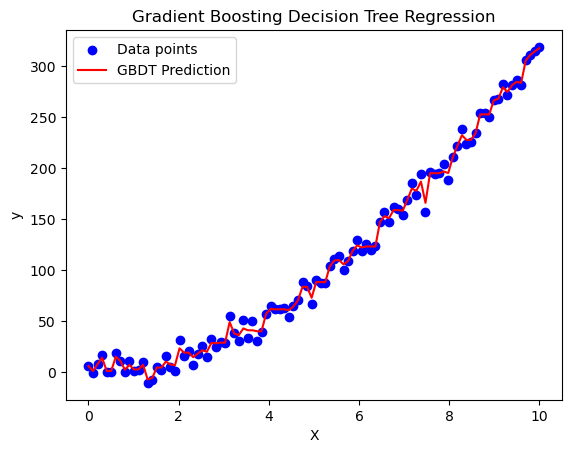

In [2]:
from sklearn.tree import DecisionTreeRegressor

class GradientBoostingRegressor:
    def __init__(self, n_estimators=100, learning_rate=0.1):
        self.n_estimators = n_estimators
        self.learning_rate = learning_rate
        self.trees = []

    def fit(self, X, y):
        # Initialize predictions to zero
        self.initial_prediction = np.mean(y)
        self.predictions = np.full_like(y, self.initial_prediction, dtype=np.float64)
        
        for _ in range(self.n_estimators):
            # Compute residuals
            residuals = y - self.predictions
            
            # Fit a decision tree to the residuals
            tree = DecisionTreeRegressor(max_depth=3)
            tree.fit(X.reshape(-1, 1), residuals)
            self.trees.append(tree)
            
            # Update predictions
            predictions_update = tree.predict(X.reshape(-1, 1))
            self.predictions += self.learning_rate * predictions_update

    def predict(self, X):
        # Initialize predictions with the initial prediction
        predictions = np.full(X.shape[0], self.initial_prediction, dtype=np.float64)
        
        for tree in self.trees:
            predictions += self.learning_rate * tree.predict(X.reshape(-1, 1))
        
        return predictions

# Example usage
gbdt = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1)
gbdt.fit(X, y)
y_pred = gbdt.predict(X)

# Plotting the results
plt.scatter(X, y, color='blue', label='Data points')
plt.plot(X, y_pred, color='red', label='GBDT Prediction')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Gradient Boosting Decision Tree Regression')
plt.legend()
plt.show()